# DIABETES PREDICTION 

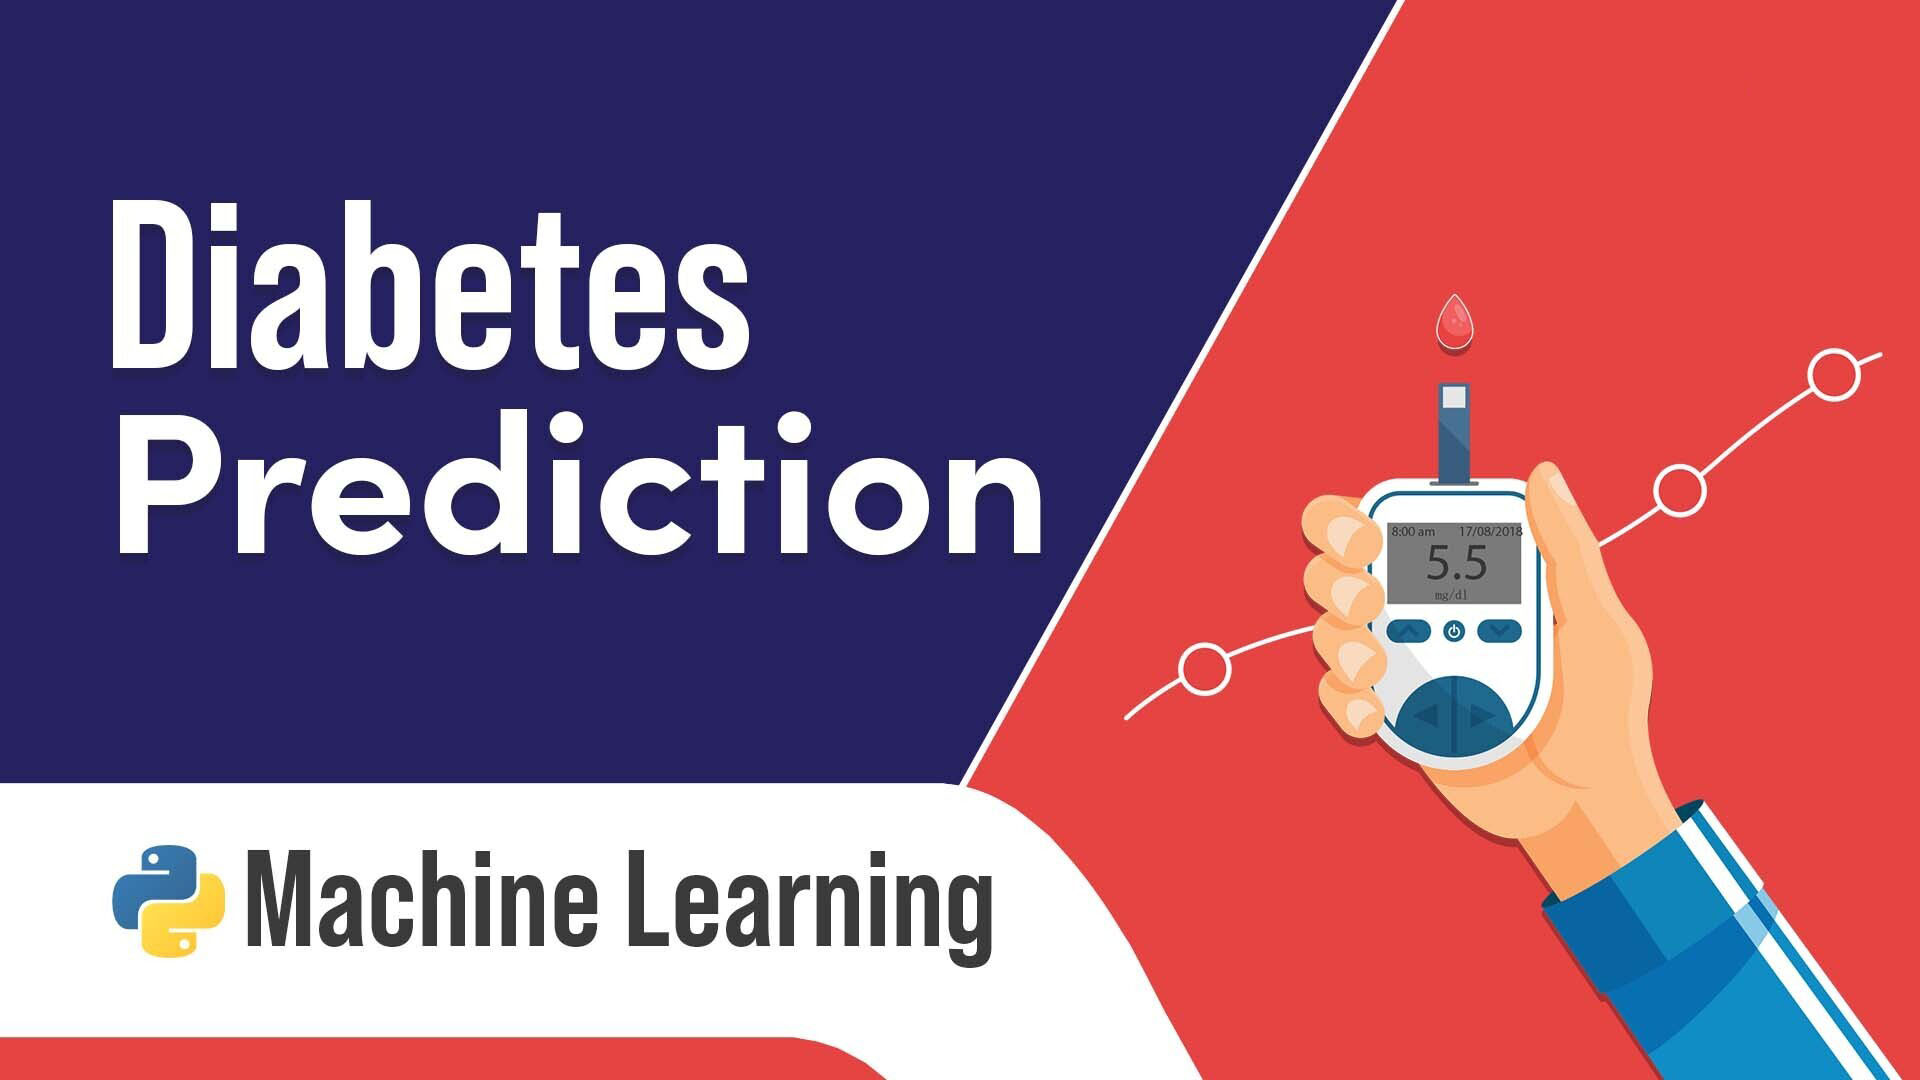

## 1.Importing the necessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 2.Loading the dataset

In [38]:
df = pd.read_csv("diabetics.csv")

## 3.Inspecting the data

>3.1 To see the first five rows of the dataset

In [39]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


>3.2 To see the last five rows of the dataset

In [40]:
print(df.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


>3.3 To get information about the dataset, data types, and non-null counts

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## 4.Handling missing values (if any)

In [42]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## 5.Data Visualization

>5.1 Plotting a scatter plot of 'Glucose' against 'BMI'

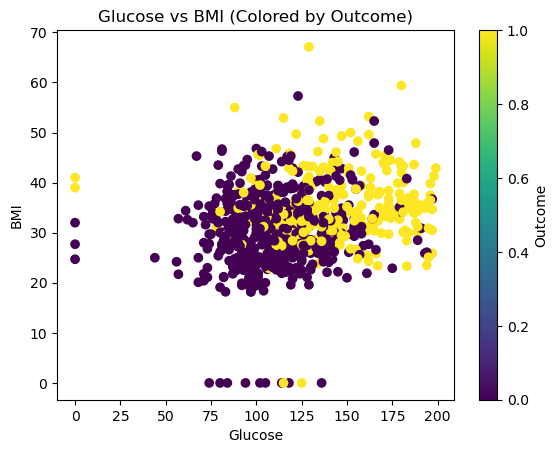

In [43]:
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI (Colored by Outcome)')
plt.colorbar(label='Outcome')
plt.show()

>5.2 Count the number of occurrences of each class in 'Outcome' column

In [44]:
outcome_counts = df['Outcome'].value_counts()
outcome_counts

0    500
1    268
Name: Outcome, dtype: int64

>5.3 Plotting a bar plot for the class distribution

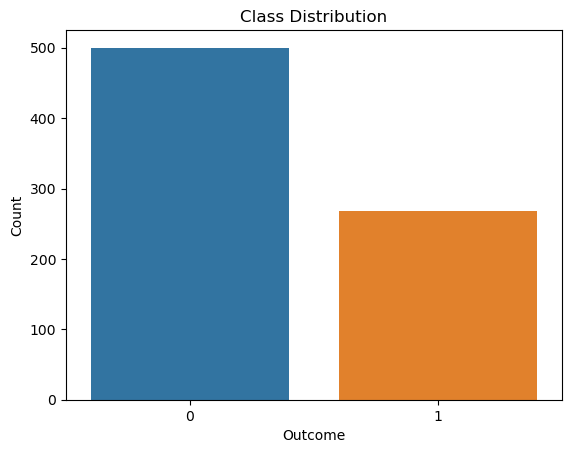

In [45]:
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

>5.4 Plotting a box plot of 'Age' for each class in 'Outcome'

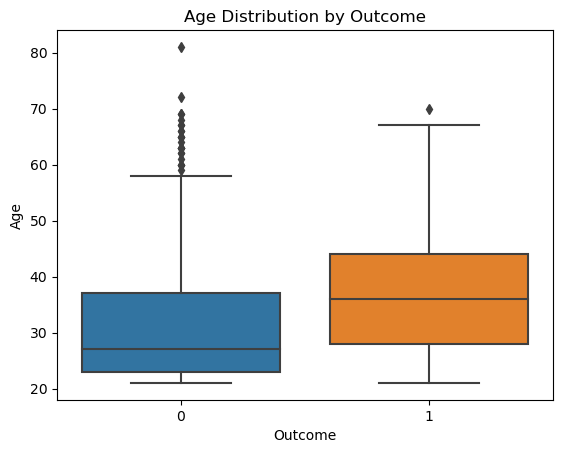

In [46]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Age Distribution by Outcome')
plt.show()

>5.5 Calculating the correlation matrix

In [47]:
correlation_matrix = df.corr()
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


>5.6 Plotting a heatmap of the correlation matrix

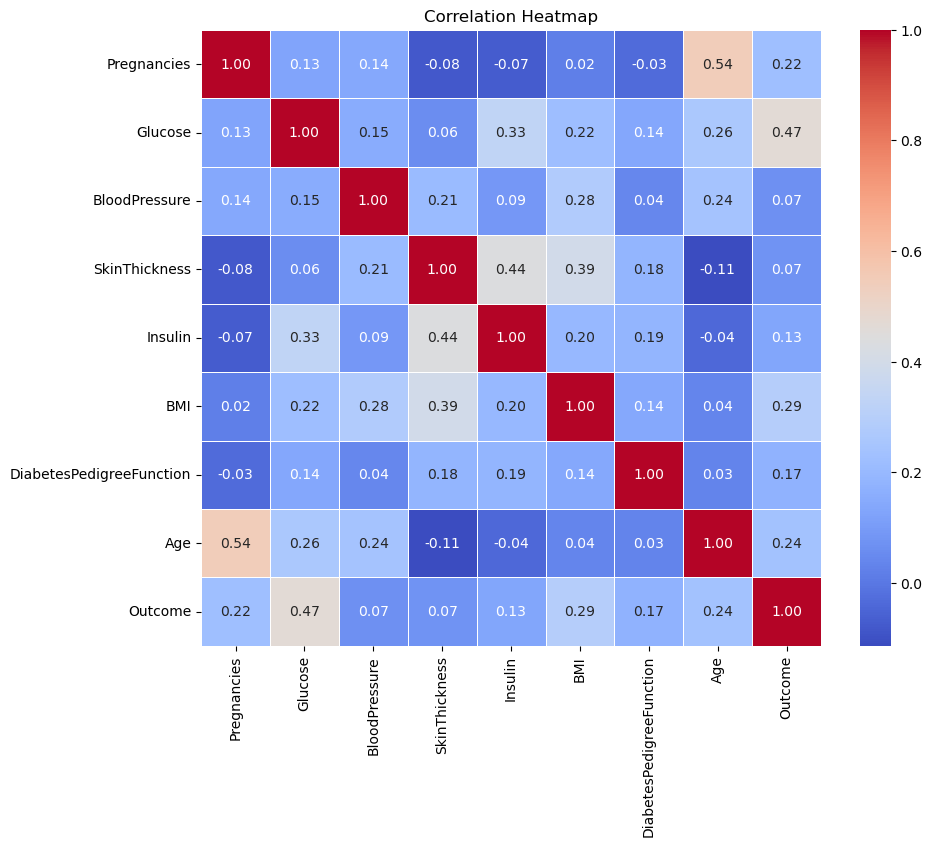

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 6.Data Splitting

>6.1 Features:

In [49]:
X = df.drop('Outcome', axis=1)

>6.2 Target variable:

In [50]:
y = df['Outcome']

>6.3 Spliting the data into training and testing sets (80% training, 20% testing)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7.Model Training

>7.1 Creating and training the Decision Tree model

In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 8.Model Evaluation

>8.1 Making predictions on the test set

In [53]:
y_pred = model.predict(X_test)

## 9.Calculating accuracy score

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


>9.1 Creating a confusion matrix

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[75 24]
 [15 40]]


## 10.Conclusion

>The prediction's accuracy of 0.7467532467532467 indicates that the model achieved an accuracy of approximately 74.68% on the test data. This means that around 74.68% of the test samples were correctly classified by the model, while the remaining 25.32% were misclassified.